In [47]:
import pandas as pd

dd = pd.read_csv('sampledogs.csv')
dd.head()

,CORREL,CHISQR,INTERSECT,BHATTACHARYYA,EMD,Screen_Transition
0,0.816530,61.778096,0.690302,0.302686,23.100193,0
1,0.926816,44.729340,0.763327,0.250742,15.730139,0
2,0.950915,18.524202,0.851856,0.180276,8.990320,0
3,0.968113,8.202692,0.850708,0.155560,6.707363,0
4,0.898089,30.017232,0.736819,0.228800,13.960211,0


In [48]:
#데이터프레임 자료형이 아닌 리스트로 필요해서 후첨함
r1 = ['CORREL','CHISQR','INTERSECT','BHATTACHARYYA','EMD']
r2 = ['Screen_Transition']

In [49]:
import sklearn
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

In [50]:
x = dd[['CORREL','CHISQR','INTERSECT','BHATTACHARYYA','EMD']]
y = dd['Screen_Transition']

In [51]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1)

CPU times: total: 0 ns
Wall time: 2.07 ms


In [52]:
model = DecisionTreeClassifier(random_state=0)
model.fit(x_train,y_train)

CPU times: total: 0 ns
Wall time: 4.67 ms


DecisionTreeClassifier(random_state=0)

In [53]:
pred = model.predict(x_test) 

from sklearn.metrics import accuracy_score
print('예측 정확도: {0:.4f}'.format(accuracy_score(y_test,pred)))

예측 정확도: 0.9500
CPU times: total: 0 ns
Wall time: 4.75 ms


CORREL : 0.029
CHISQR : 0.000
INTERSECT : 0.020
BHATTACHARYYA : 0.951
EMD : 0.000


<AxesSubplot:>

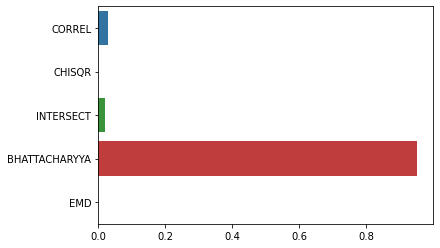

In [54]:
import seaborn as sns
import numpy as np
%matplotlib inline

# feature별 importance 매핑
for name, value in zip(r1 , model.feature_importances_):
    print('{} : {:.3f}'.format(name, value))

# feature importance를 column 별로 시각화 하기 
sns.barplot(x=model.feature_importances_ , y=r1)